In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3701,ham,Hey loverboy! I love you !! I had to tell ... ...,NaN,NaN,NaN
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P",NaN,NaN,NaN
2348,ham,That seems unnecessarily affectionate,NaN,NaN,NaN
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...,NaN,NaN,NaN
812,spam,Congratulations ur awarded either å£500 of CD ...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
4460,ham,Thanks again for your reply today. When is ur ...
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
1180,ham,I'm in chennai velachery:)
3597,ham,"Aight, we'll head out in a few"


In [11]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [12]:
df.sample(5)

,target,text
5495,ham,"Good afternoon, my love ... How goes your day ..."
1344,ham,Were somewhere on Fredericksburg
3175,ham,Havent still waitin as usual... ÌÏ come back s...
3639,ham,He's really into skateboarding now despite the...
552,ham,"Sure, if I get an acknowledgement from you tha..."


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['target']=le.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#Check for Duplicate Values
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

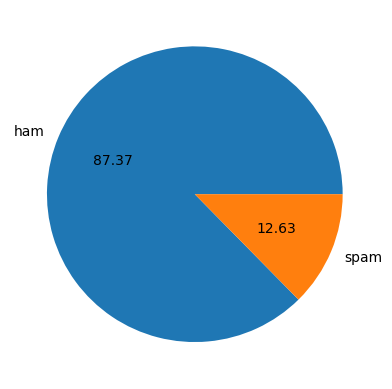

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df.loc[ : ,'num_characters'] = df['text'].apply(len)
df.loc[ : ,'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.loc[ : ,'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#Non-Spam
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

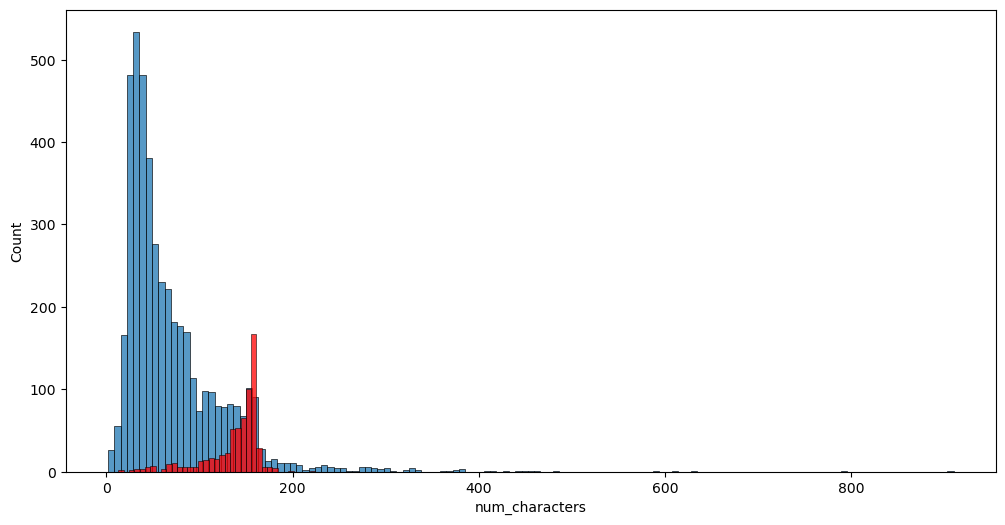

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

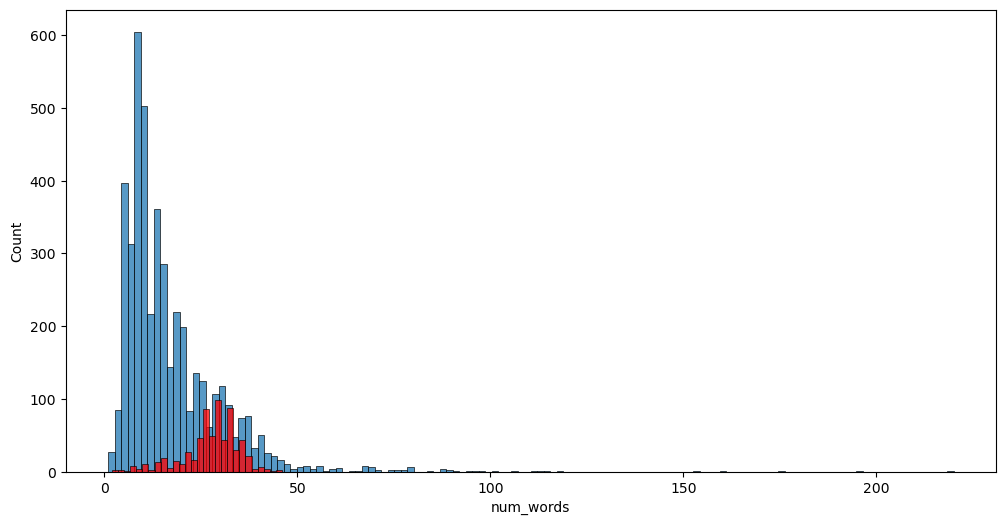

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = "red")

<Axes: xlabel='num_sentences', ylabel='Count'>

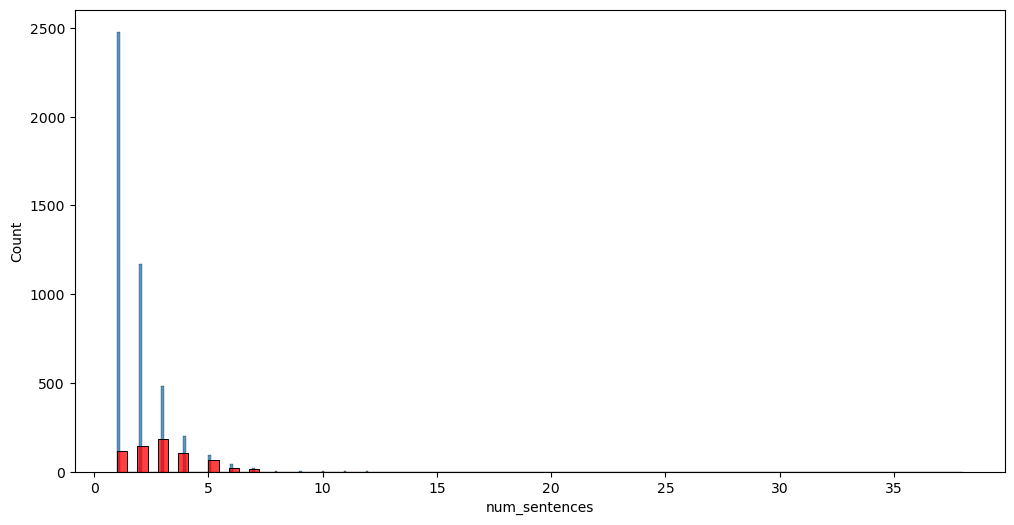

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color = "red")

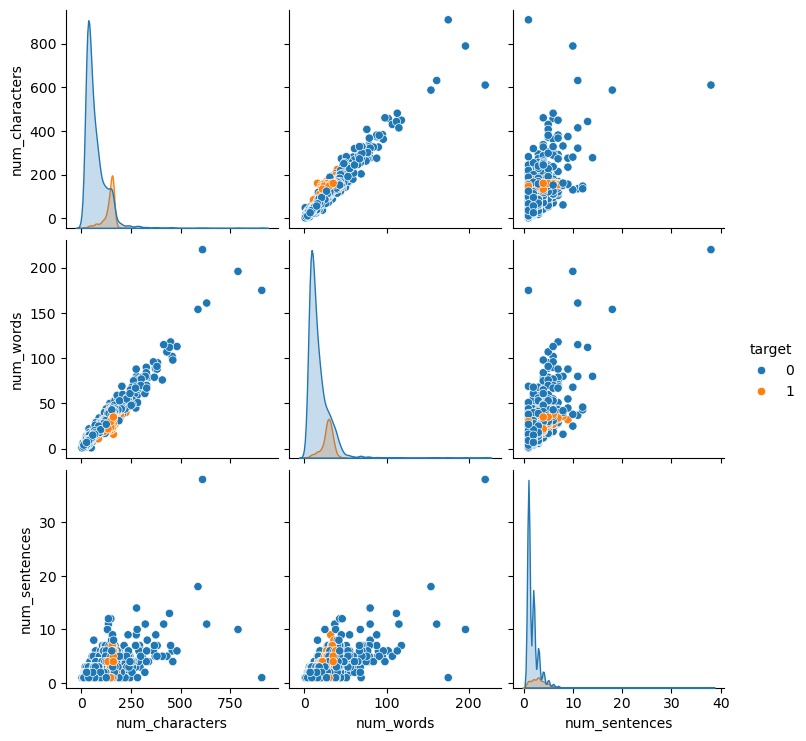

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

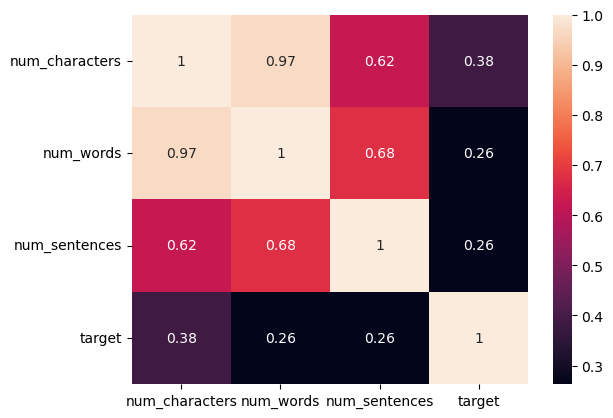

In [35]:
sns.heatmap(df[['num_characters', 'num_words', 'num_sentences', 'target']].corr(), annot=True)

Data Preprocessing

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y = []
    ps = PorterStemmer()
    for i in text:
         y.append(ps.stem(i))
    return y

In [61]:
df.loc[ : ,'transformed_text'] = df['text'].apply(transform_text)

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [63]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.join(' ').to_string())

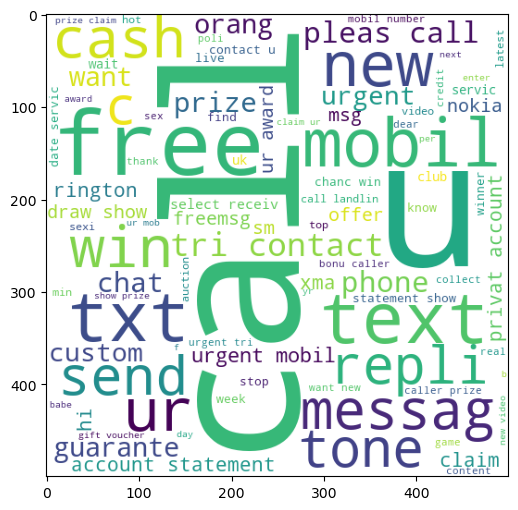

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [64]:
non_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.join(' ').to_string())

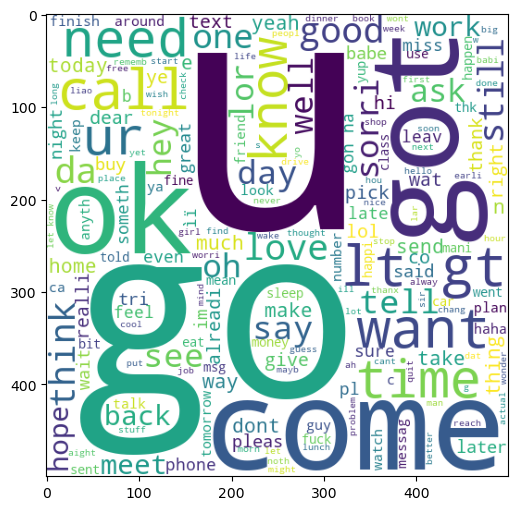

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(non_spam_wc)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    for word in msg:
        spam_corpus.append(word)

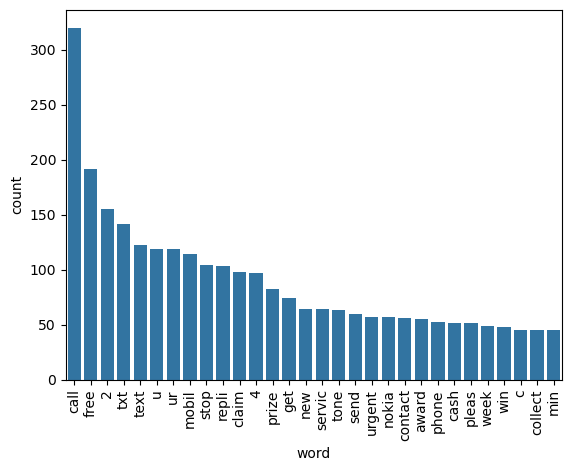

In [54]:
from collections import Counter
import pandas as pd

top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
non_spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg:
        non_spam_corpus.append(word)

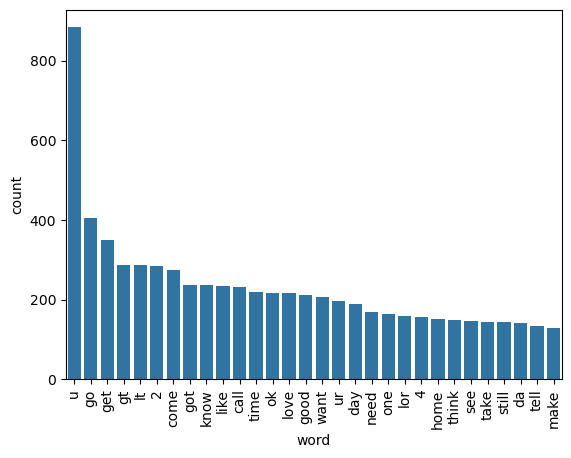

In [56]:
from collections import Counter
import pandas as pd

top_words = pd.DataFrame(Counter(non_spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

In [108]:
X = tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x))).toarray()
X.shape

(5169, 5000)

In [109]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8549323017408124
[[763 126]
 [ 24 121]]
0.4898785425101215


In [113]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9671179883945842
[[888   1]
 [ 33 112]]
0.9911504424778761


In [114]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [115]:
# tfidf-->bnb

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [117]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [118]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [119]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [120]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9609375
For  KN
Accuracy -  0.8955512572533849
Precision -  1.0
For  NB
Accuracy -  0.9671179883945842
Precision -  0.9911504424778761
For  DT
Accuracy -  0.9187620889748549
Precision -  0.801980198019802
For  LR
Accuracy -  0.9487427466150871
Precision -  0.9259259259259259
For  RF
Accuracy -  0.9661508704061895
Precision -  0.9583333333333334


c:\Users\malla\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.8984375
For  BgC
Accuracy -  0.9555125725338491
Precision -  0.8561151079136691
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9578947368421052
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9354838709677419


In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [122]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.895551,1.000000
2,NB,0.967118,0.991150
8,ETC,0.974855,0.983740
0,SVC,0.973888,0.960938
5,RF,0.966151,0.958333
9,GBDT,0.943907,0.957895
10,xgb,0.964217,0.935484
4,LR,0.948743,0.925926
6,AdaBoost,0.958414,0.898438
7,BgC,0.955513,0.856115


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [124]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.895551
1,NB,Accuracy,0.967118
2,ETC,Accuracy,0.974855
3,SVC,Accuracy,0.973888
4,RF,Accuracy,0.966151
5,GBDT,Accuracy,0.943907
6,xgb,Accuracy,0.964217
7,LR,Accuracy,0.948743
8,AdaBoost,Accuracy,0.958414
9,BgC,Accuracy,0.955513


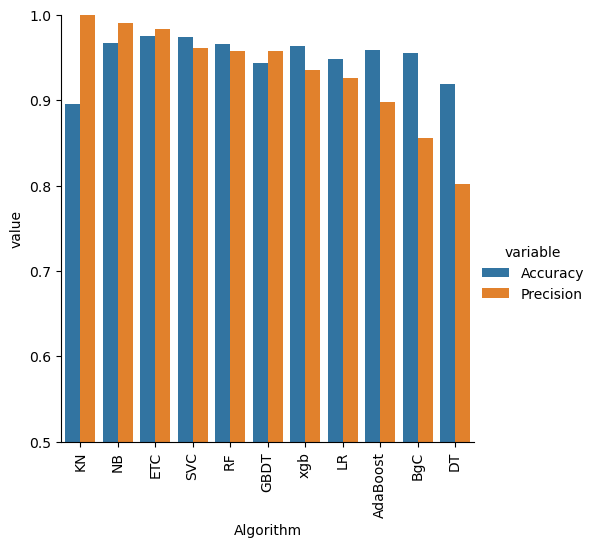

In [125]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [127]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))